In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

device = "cuda:0"
torch.set_default_device(device)

from LION.experiments import ct_experiments
experiment = ct_experiments.LowDoseCTRecon(dataset="LIDC-IDRI")
lidc_dataset = experiment.get_training_dataset()

from scripts.example_scripts.PCM_CS_demo import run_demo

Preparing patient list, this may take time....
Patient lists ready for train dataset


Using device: cuda:0
Running SPGL1 reconstruction: 1000 iterations, lambda=0.001...

SPGL1
No. rows              :     4096     
No. columns           :   262144

Initial tau           : 0.00e+00     
Two-norm of b         : 6.95e+04

Optimality tol        : 1.00e-04     
Target objective      : 0.00e+00

Basis pursuit tol     : 1.00e-06     
Maximum iterations    :     1000

iterr      Objective   Relative Gap  Rel Error      gnorm   stepg   nnz_x   nnz_g     tau

    0  6.9524672e+04  0.0000000e+00   1.00e+00  9.516e+06     0.0       0       0  5.0796872e+02
    1  6.9012680e+04  1.9999998e+00   1.00e+00  9.446e+06    -2.7    3039       1               
    2  2.7480549e+04  3.2976273e-02   1.00e+00  1.697e+06     0.0      36       1               
    3  2.7480355e+04  4.9001945e-04   1.00e+00  1.671e+06     0.0      36       1  9.5982672e+02
    4  1.1247045e+04  1.5361348e+00   1.00e+00  3.171e+05     0.0     293       1               
    5  1.1221871e+04  3.1782180e-01   1.00e+0

Linesearch failed with error 1. Damping max BB scaling to 10000.0


   95  7.1810734e-01  2.5857266e+03   7.18e-01  6.419e+00     0.0    3633       1  1.8509935e+03
  100  1.3331687e-02  2.7825559e+03   1.33e-02  1.498e+00     0.0    3634       0               
  110  1.0686520e-02  1.2930046e+03   1.07e-02  6.829e-01    -0.9    3634       0               
  120  9.4975401e-03  1.6497777e+03   9.50e-03  8.955e-01    -0.9    3634       1               
  130  9.7668041e-03  1.5625847e+03   9.77e-03  8.299e-01    -1.5    3634       0               


Linesearch failed with error 1. Damping max BB scaling to 1000.0
Linesearch failed with error 1. Damping max BB scaling to 100.0
Linesearch failed with error 1. Damping max BB scaling to 10.0
Linesearch failed with error 1. Damping max BB scaling to 1.0
Linesearch failed with error 1. Damping max BB scaling to 0.1
Linesearch failed with error 1. Damping max BB scaling to 0.01
Linesearch failed with error 1. Damping max BB scaling to 0.001
Linesearch failed with error 1. Damping max BB scaling to 0.0001


  140  1.0038345e-02  1.6016853e+03   1.00e-02  8.559e-01    -0.3    3634       1               


Linesearch failed with error 1. Damping max BB scaling to 1e-05


  144  1.0034223e-02  1.6018330e+03   1.00e-02  8.559e-01     0.0    3634       1               

ERROR EXIT -- Linesearch error (1)

Products with A     :     497        Total time   (secs) :     7.4
Products with A^H   :     134        Project time (secs) :     4.9
Newton iterations   :      12        Mat-vec time (secs) :     0.1
Line search its     :     304        Subspace iterations :       0
Running debiasing: 10 iterations...


Debiasing LS: 100%|██████████| 10/10 [00:00<00:00, 143.35it/s]


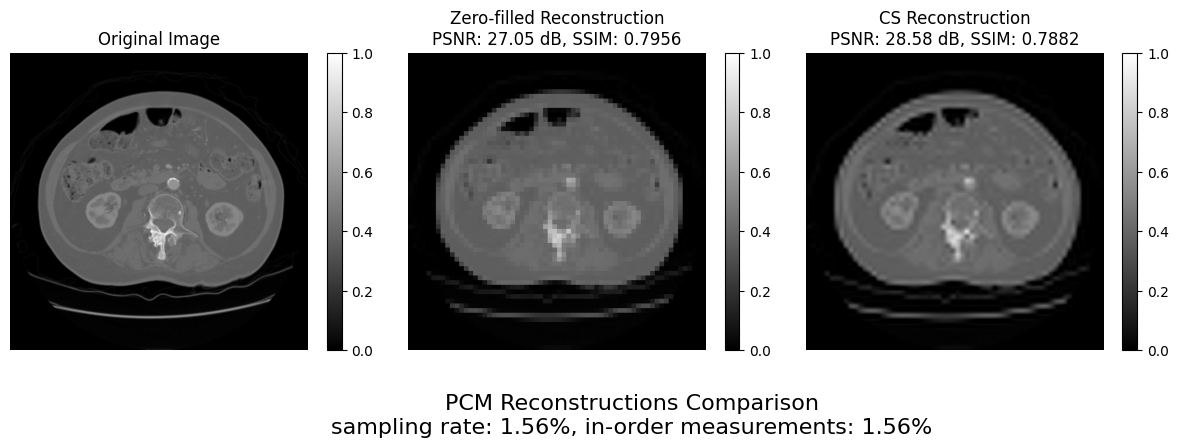

In [3]:
run_demo(
    algo="spgl1",
    dataset=lidc_dataset,
    # subtract_from_J=1,
    # delta_divided_by=4,
    # subtract_from_J=2,
    # delta_divided_by=16,
    subtract_from_J=3,
    delta_divided_by=64,
    max_iter=1000,
    debias_max_iter=10,
    debias_support_tol=1e-5,
    debias_tol=1e-7,
    verbose=True,
    clim=(0, 1),
)

Using device: cuda:0
Running FISTA reconstruction: 1000 iterations, lambda=10...


FISTA l1:  64%|██████▍   | 641/1000 [00:04<00:02, 146.71it/s]


Running debiasing: 10 iterations...


Debiasing LS: 100%|██████████| 10/10 [00:00<00:00, 147.75it/s]


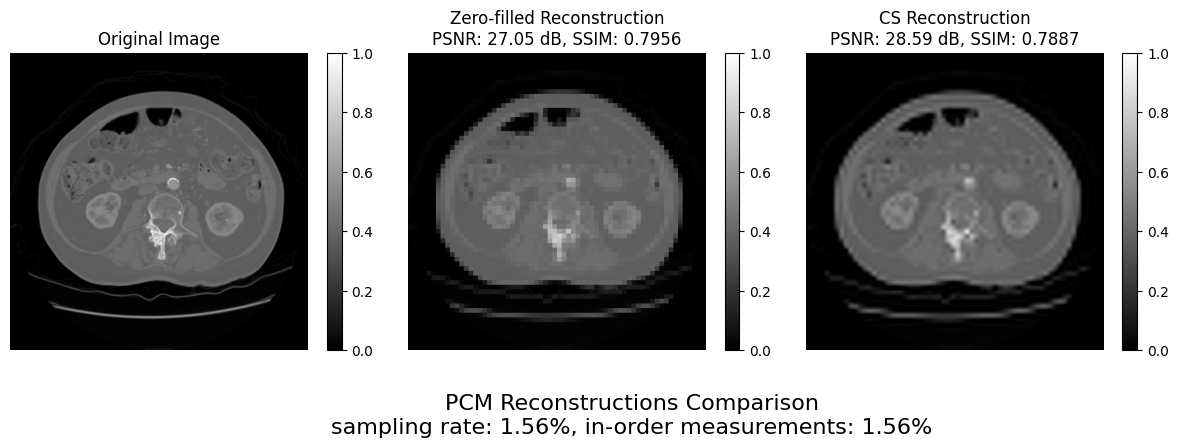

In [4]:
run_demo(
    algo="fista",
    dataset=lidc_dataset,
    # subtract_from_J=1,
    # delta_divided_by=4,
    # subtract_from_J=2,
    # delta_divided_by=16,
    subtract_from_J=3,
    delta_divided_by=64,
    lam=10,  # Good for Daubechies 4 wavelet transform
    max_iter=1000,
    debias_max_iter=10,  # TODO: Debiasing seems to not make much difference here
    debias_support_tol=1e-5,
    debias_tol=1e-7,
    # verbose=True,
    clim=(0, 1),
)